In [1]:
import glob, os, gc, sys
import os.path
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import offsetbox
from matplotlib.pyplot import imshow
from time import time
from subprocess import (call, Popen, PIPE)
from itertools import product
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)
from sklearn.decomposition import (PCA, RandomizedPCA)
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
from sklearn import preprocessing
from IPython.display import Image
from PIL import Image
from IPython.display import Image as IPImage
import shutil
import re
import xml.etree.ElementTree as ET
import time

/home/ubuntu/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [ ]:
basepath = "/home/ubuntu/efs/SLAV_Data/SLAV_Train/tSNE_Data/"
os.chdir(os.path.join(basepath))
filelist = glob.glob('*.png')
X_128 = np.array([np.array(Image.open(fname).resize((128,128))) for fname in filelist])
np.save('Train_Subset128.npy', X_128)

In [2]:
basepath = "/home/ubuntu/efs/SLAV_Data/SLAV_Train/tSNE_Data/"
os.chdir(os.path.join(basepath))
X = np.load('Train_Subset128.npy')
X2 = X.reshape(X.shape[0], -1)

In [3]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=5000, n_jobs=64)
tsne_results = tsne.fit_transform(X2)

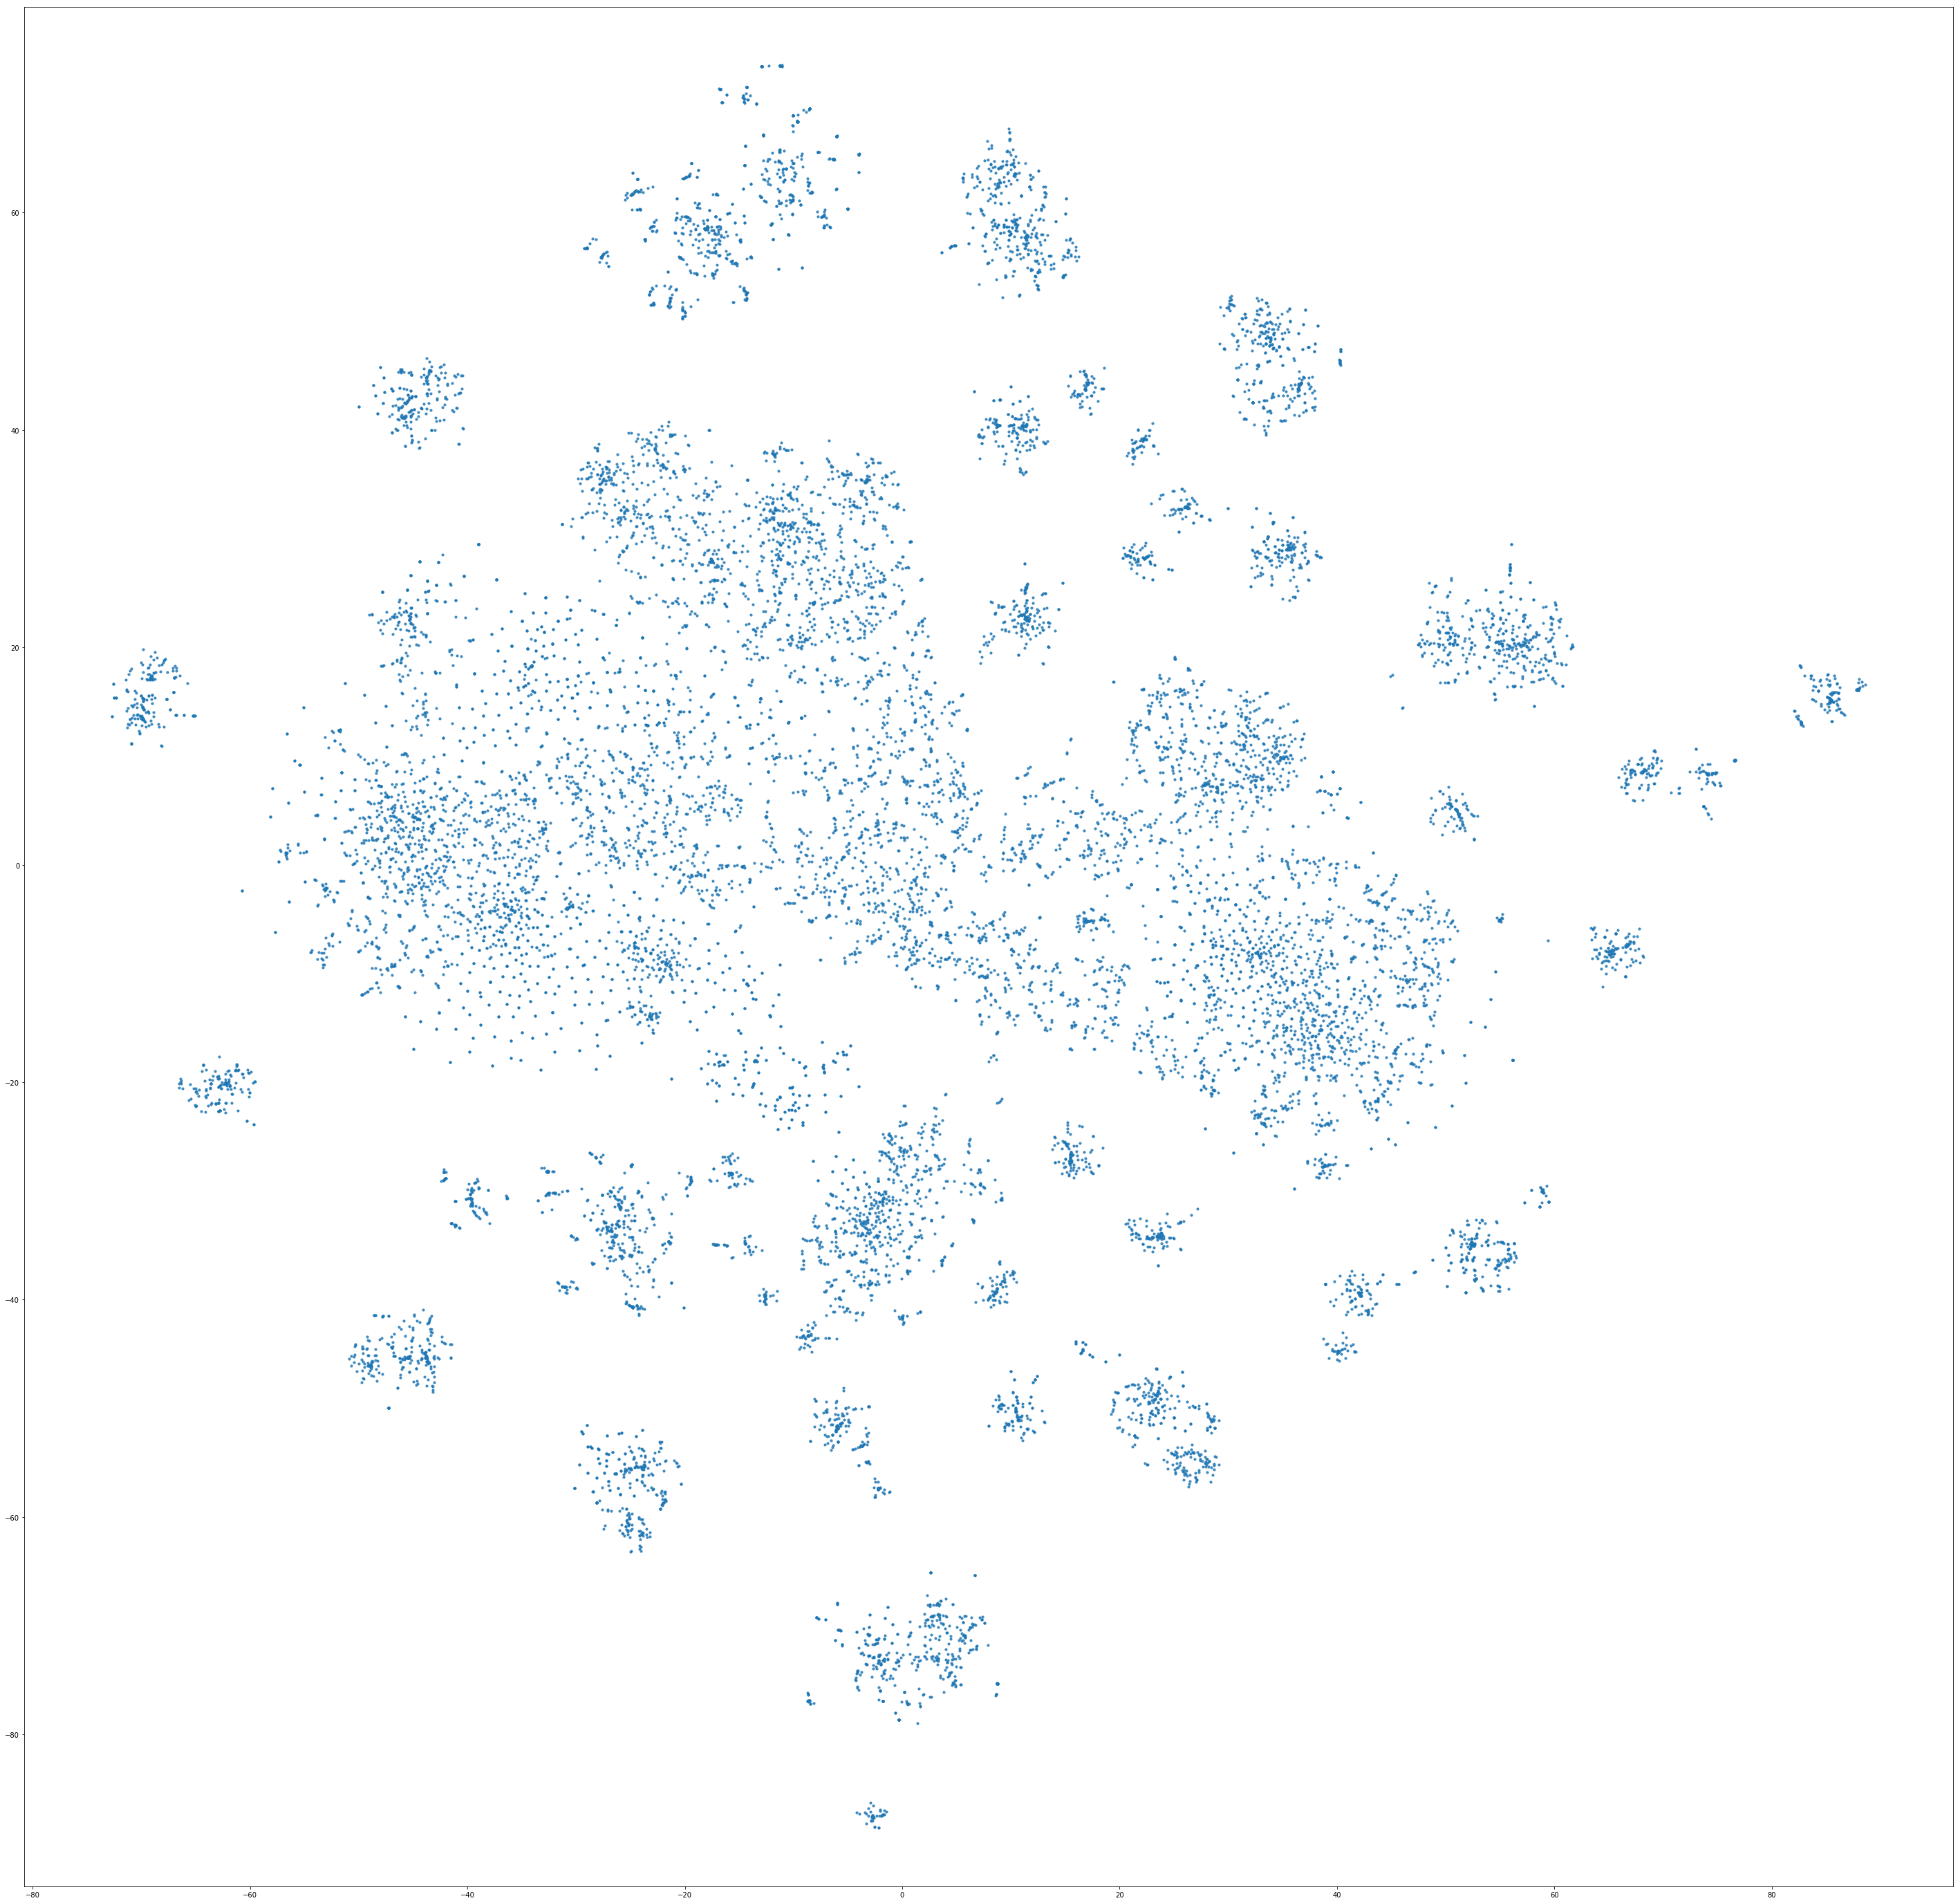

In [4]:
plt.rcParams["figure.figsize"] = (50,50)
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.8, s=10)
plt.axis('equal');
plt.show()

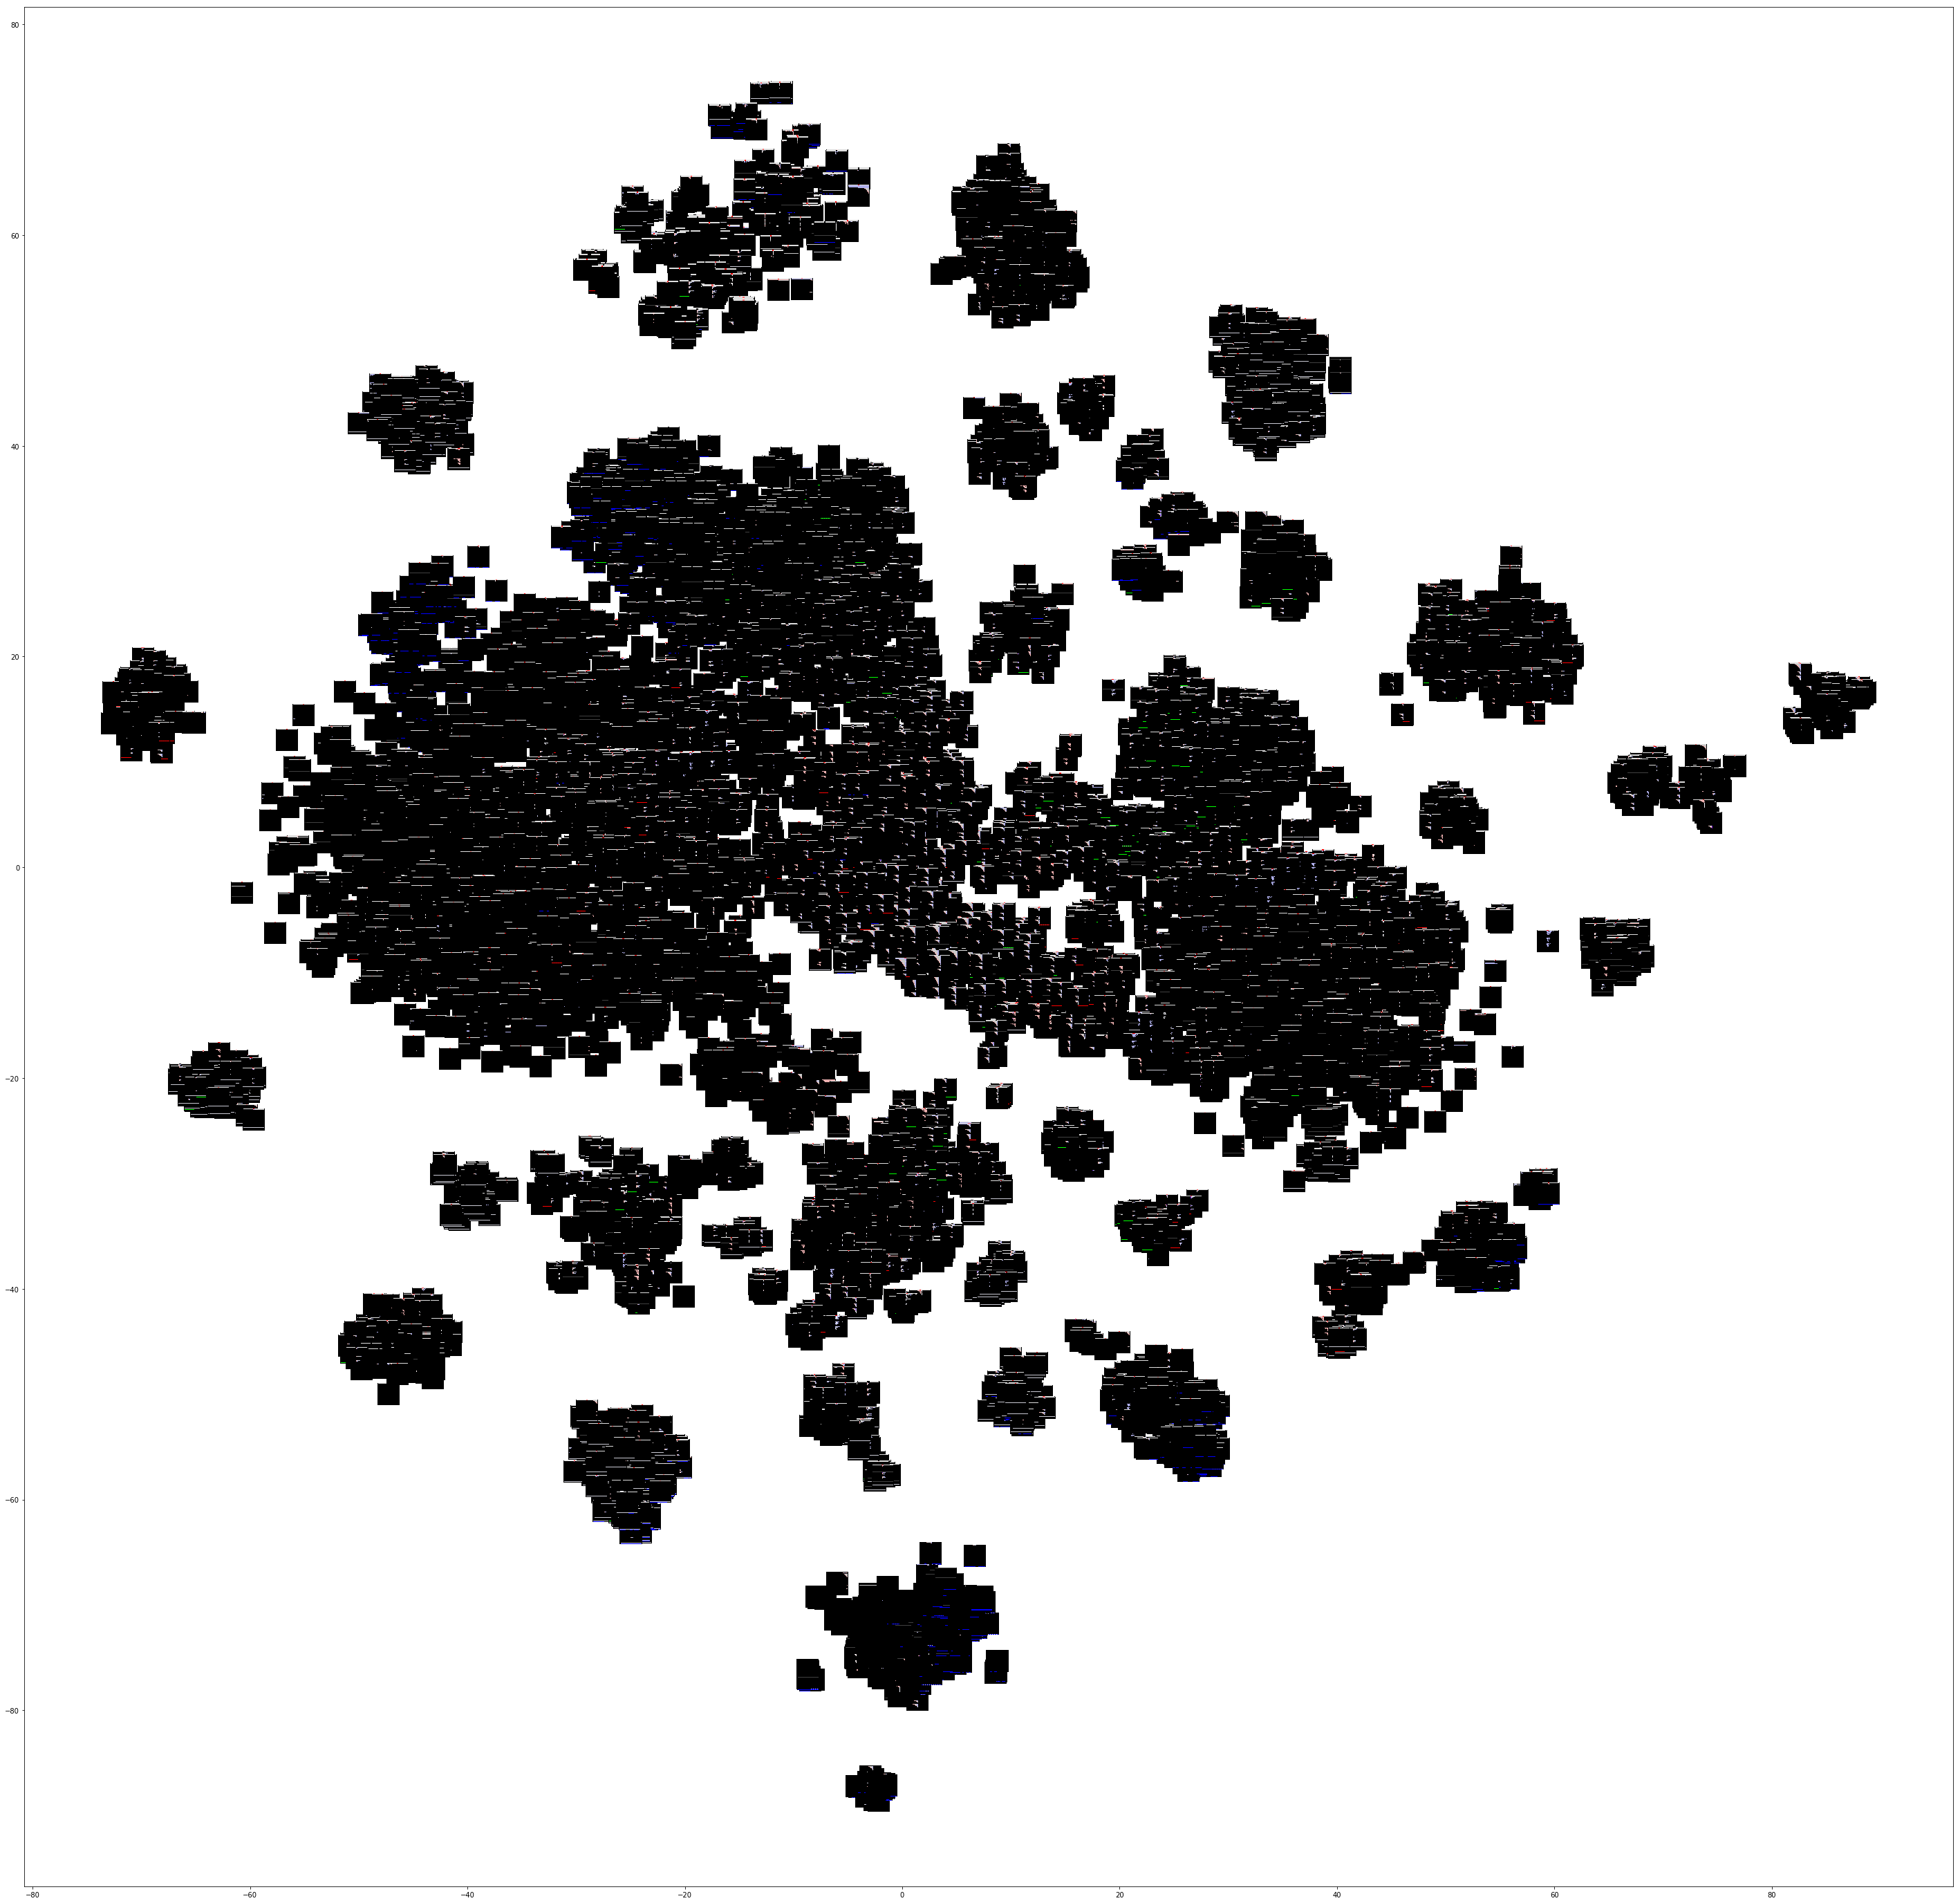

In [5]:
%matplotlib inline
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def visualize_scatter_with_images(X_2d_data, images, figsize=(50,50), image_zoom=.25):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()

visualize_scatter_with_images(tsne_results, images = X, image_zoom=0.25)

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(X_Result[:, 0], X_Result[:, 1], alpha=0.8, s=2)
plt.axis('equal');
plt.show()

In [3]:
X.shape

(15382, 128, 128, 3)

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
var_pca= pca.explained_variance_ratio_
var_pca_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print var_pca_sum
plt.plot(var_pca_sum)

In [ ]:
np.save('PCA_500.npy', X_Result)
print 'Explained variation per principal component (PCA): {}'.format(np.sum(pca.explained_variance_ratio_))

In [ ]:
%matplotlib inline


In [ ]:
basepath = "/home/ubuntu/efs/SLAV_Data/SLAV_Train/tSNE_Data/"
os.chdir(os.path.join(basepath))
from MulticoreTSNE import MulticoreTSNE as TSNE
X_Result = np.load('PCA_500.npy')
X = np.load('Train_Subset.npy')
#from sklearn.manifold import TSNE
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=2, verbose=2, perplexity=40, n_iter=5000, n_jobs=64)
tsne_results = tsne.fit_transform(X_Result)

print 't-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start)

In [ ]:
%matplotlib inline
imgplot2 = plt.imshow(X2) # show the window